> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# IV: KNN Classifier

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

In [1]:
%load_ext autoreload
%autoreload 2

import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2020-03-12 01:34:55.560604


## Problem description

In this homework, we will implement a k-NN classifier with the MNIST dataset. The MNIST dataset contains handwritten digits with corresponding labels from $0$ to $9$, and it has been commonly used for testing various machine learning algorithms. The $\texttt{sklearn.datasets}$ package provides the MNIST dataset. You can load the dataset as follows.

In [2]:
from sklearn import datasets
import numpy as np

In [3]:
mnist = datasets.load_digits()

The $\texttt{train_test_split}$ function from $\texttt{sklearn.model_selection}$ package makes it easy to split datasets into training and test sets. We can easily makes a validation set from the test one as well. See the example shown below.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
(X_train, X_test, y_train, y_test) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.33, random_state=42)
(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

where X_train, X_test and X_val are training, test, and validation sets, respectively. y_train, y_test and y_val are labels for X_train, X_test, and X_val, respectively.

The datset contains 64-dimensional vectors, and we can visualize each one with the $\texttt{imshow}$ function after reshaping it as follows.

In [6]:
print("X_train.shape: ", X_train.shape)
print("X_train[0].shape: ",X_train[0].shape)
print("y_train.shape: ", y_train.shape)

X_train.shape:  (806, 64)
X_train[0].shape:  (64,)
y_train.shape:  (806,)


In [7]:
import matplotlib.pyplot as plt

A label for 8th sample in the training set is 5


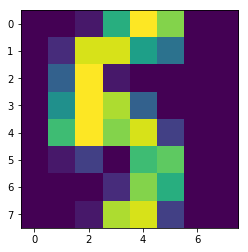

In [8]:
sample_number = 8
n_col = 8
n_row = 8
im=plt.imshow(X_train[sample_number].reshape(n_col,n_row))
print('A label for %dth sample in the training set is %d' % (sample_number, y_train[sample_number]))

## I. Solve Problem  (80 points)
### P1.1
(*60 points*) Implement a K-NN classifier.    

In [9]:
from P04_2 import predict

- Predict label of first test sample when k=20.

In [10]:
k = 20
prediction_of_first_sample = predict(X_train, y_train, X_test[0], k)

In [11]:
print(prediction_of_first_sample)

6


In [12]:
label_of_first_sample = y_test[0]
print(label_of_first_sample)

6


A label of first sample in the test set is 6


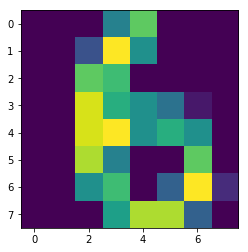

In [13]:
n_col = 8
n_row = 8
im=plt.imshow(X_test[0].reshape(n_col,n_col))
print('A label of first sample in the test set is %d' % (y_test[0]))

In [14]:
print("Prediction and label are same :", (prediction_of_first_sample==label_of_first_sample))

Prediction and label are same : True


- You should get appropriate accuracy on test data when k=10 

In [15]:
from P04_2 import accuracy

In [16]:
k =10 
accuracy_when_k_equals_10 = accuracy(X_train, y_train, X_test, y_test, k)

In [17]:
print(accuracy_when_k_equals_10)

0.9848484848484849


### P1.2
(*20 points*) Plot accuracy on the validation set according to the value of $k$, where $k = 1,2,...,20$. Choose the optimal $k$ value from the plot and compute accuracy on the test set. 

In [18]:
from P04_2 import stack_accuracy_over_k

In [19]:
accuracies_k = stack_accuracy_over_k(X_train, y_train, X_val, y_val)

In [20]:
len(accuracies_k)

20

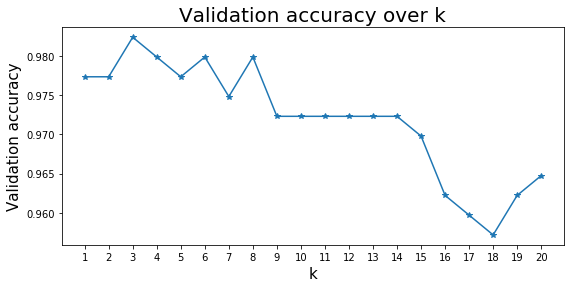

In [33]:
plt.figure(figsize=(9,4))
plt.plot(np.arange(20)+1, accuracies_k, marker= '*')
plt.xticks(np.arange(1, 21, step=1))
plt.title('Validation accuracy over k', fontsize=20)
plt.xlabel('k', fontsize=15)
plt.ylabel('Validation accuracy', fontsize=15)
plt.show()

In [22]:
from P04_2 import stack_accuracy_over_lambda

In [23]:
accuracies_lambda = stack_accuracy_over_lambda(X_train, y_train, X_val, y_val)

In [24]:
len(accuracies_lambda)

20

In [25]:
print(accuracies_lambda)

[0.982367758186398, 0.982367758186398, 0.982367758186398, 0.982367758186398, 0.982367758186398, 0.982367758186398, 0.982367758186398, 0.982367758186398, 0.982367758186398, 0.982367758186398, 0.9748110831234257, 0.9748110831234257, 0.9773299748110831, 0.9773299748110831, 0.9773299748110831, 0.9773299748110831, 0.9773299748110831, 0.3702770780856423, 0.10831234256926953, 0.0906801007556675]


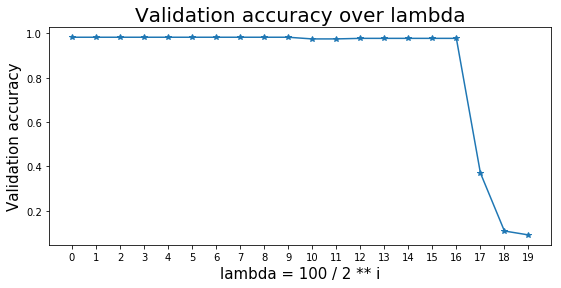

In [32]:
plt.figure(figsize=(9,4))
plt.plot(np.array(list(i for i in range(20))), accuracies_lambda, marker= '*')
plt.xticks(np.array(list(i for i in range(20))))
plt.title('Validation accuracy over lambda', fontsize=20)
plt.xlabel('lambda = 100 / 2 ** i', fontsize=15)
plt.ylabel('Validation accuracy', fontsize=15)
plt.show()

In [27]:
from P04_2 import stack_accuracy_on_k_and_lambda
accuracies_lk = stack_accuracy_on_k_and_lambda(X_train, y_train, X_val, y_val)

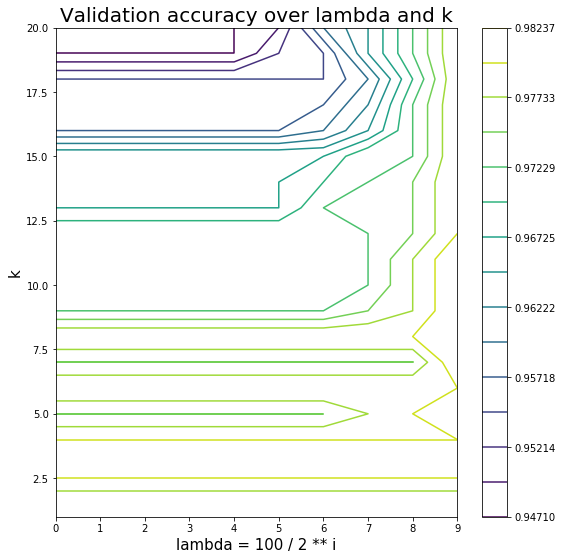

In [28]:
plt.figure(figsize=(9,9))
x = list(i for i in range(0, 10))
y = list(k for k in range(1, 21))
X_mesh, Y_mesh = np.meshgrid(x, y)
Z = accuracies_lk

contour = plt.contour(X_mesh, Y_mesh, Z, levels = np.linspace(Z.reshape(-1, 1).min(), Z.reshape(-1, 1).max(), 15))
plt.colorbar(contour)
plt.title('Validation accuracy over lambda and k', fontsize=20)
plt.xlabel('lambda = 100 / 2 ** i', fontsize=15)
plt.ylabel('k', fontsize=15)
plt.show()

In [29]:
optimal_k = np.argmax(np.asarray(accuracies_k))+1
optimal_lambda = np.argmax(np.asarray(accuracies_lambda))+1

In [30]:
optimal_k, optimal_lambda

(3, 1)

In [31]:
acc = accuracy(X_train, y_train, X_test, y_test, optimal_k, lambda_value=optimal_lambda)
print(acc)

0.9865319865319865


## Result Analysis and Discussion (20 points)

For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.

Your answer must include the analysis about:

- Algorithm of k-NN
- Difference between k-NN and regression

For KNN, if it more than two labels have the same likelyhood, the prediction requires additional reasoning sceme to choose between the same likelyhooded labels. So in this case, I implemented the weighted KNN. Instead of counting the nodes of each label, each labels are added with by the inverse of square of weights. Weights are calculated by dividing the distance of KNNs by distance of K+1th NN. Label with max value means the closest ones.

For more info on the weighted KNN, See https://epub.ub.uni-muenchen.de/1769/1/paper_399.pdf page 7

Instead of using counts of labels, we sum up the Kernel Weights of choosing.

In this case, Kernel Weight:
$$ w_i = e^{-D(x_{query}, x_i) / \lambda}$$

Where Normalized Distance for ith NN: $$ D(x_{query}, x_i) = \frac{d(x_{query}, x_i)}{d(x_{query}, x_{k+1})} $$